# Practice Case Study - Enron Network Analysis

In this case study, we will try to understand the employee network in Enron on a sample of the Enron dataset.

## Context

The story of Enron is a story of a company that reached from immense heights to deepest lows in no time.
Enron Corp. was one of the biggest firms in the United States and was delivering splendid performance on the wall street. However, the company witnesses a sudden drop in the prices and declared bankruptcy. How one of the most powerful businesses in the US and the world, disintegrated overnight is still a puzzle to many. The Enron leadership was involved in one of the biggest frauds and this particular fraud has been an area of interest for many researchers and  ML practitioners.

In this case study, we have a subset of 50 senior officials and the idea is to build a network from the mails that were sent and received to better understand the connections and highlight the important nodes (people) in this group.

## Steps

- Read the data and understand the structure of data
- Put the data into a graph
- Identify the important nodes from the visualization
- Calculate the centrality measures and quantify the importance 
- Highlight the important nodes through color coding and comment on the roles/importance that can be figured out from this.


## References
- Dataset - https://www.cs.cmu.edu/~./enron/

### Import the files

In [5]:
import pandas as pd

# installing the decorator version
from decorator import decorator
import networkx as nx
from networkx.utils import create_random_state, create_py_random_state

# from google.colab import files
# uploaded = files.upload()

In [6]:
import io
data = pd.read_csv('EmailEnron.csv')

In [7]:
data.shape

(304, 2)

In [8]:
import networkx as nx

G = nx.Graph()


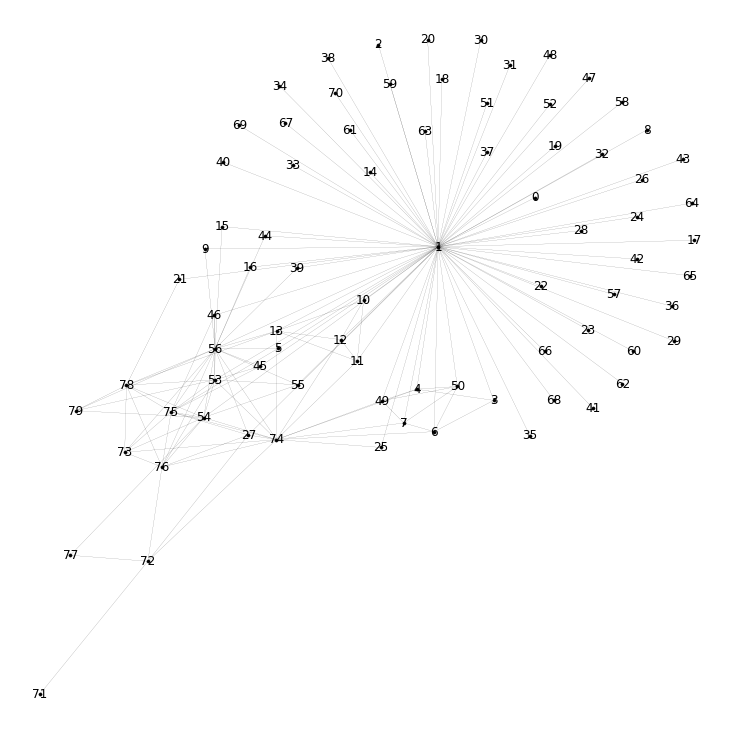

In [9]:
G = nx.from_pandas_edgelist(data, 'From', 'To')

import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

options = {
    "node_color": "black",
    "node_size": 10,
    "linewidths": 0.5,
    "width": 0.1,
}
nx.draw(G, with_labels = True, **options)
plt.show()

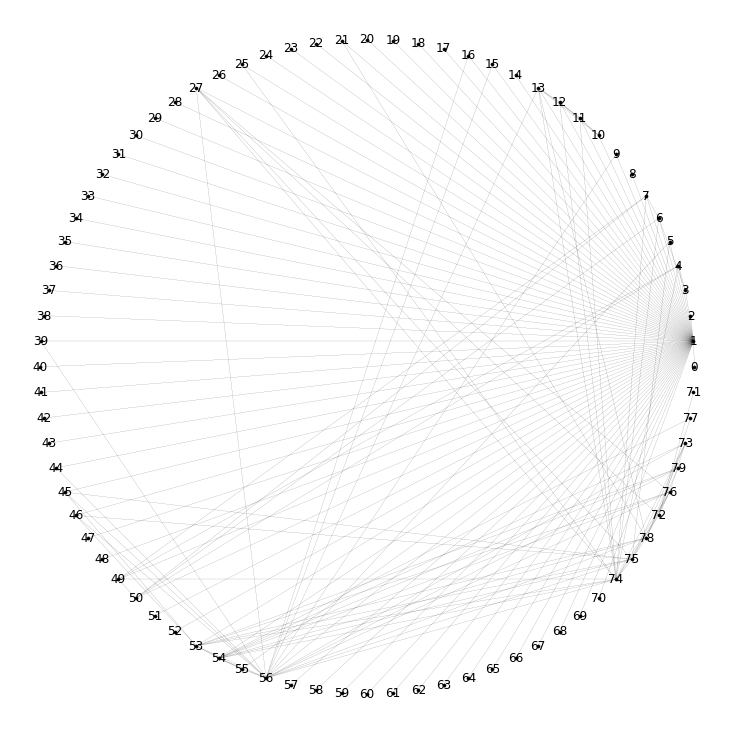

In [10]:
plt.figure(figsize = (10,10))
nx.draw_shell(G, with_labels = True, **options)

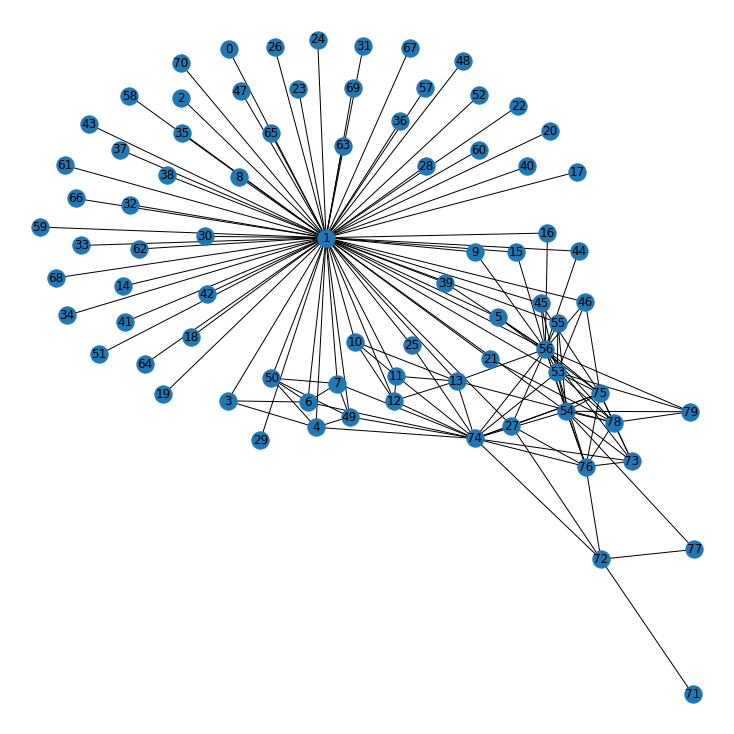

In [11]:
plt.figure(figsize = (10,10))
nx.draw_spring(G, with_labels = True) # with the default parameters

### **Observations**

- Out of the 80 nodes in the dataset, 1 appears to be the most important node and is connected with all the other nodes. We can interpret this official, perhaps as the CEO.
- Other important nodes are also highlighted in the visualization - 56,54,74,53,50. The circular visualization is a better visualization approach to clearly highlight the important nodes.
- There are internal team structures that appear from the visualization but are not very clear as to which nodes are part of the teams.

In [12]:
# Let us quickly look at the degree of the nodes
for i in G.degree():
  print(i)

(0, 1)
(1, 70)
(2, 1)
(3, 3)
(4, 5)
(5, 3)
(6, 5)
(7, 5)
(8, 1)
(9, 2)
(10, 4)
(11, 5)
(12, 5)
(13, 7)
(14, 1)
(15, 2)
(16, 2)
(17, 1)
(18, 1)
(19, 1)
(20, 1)
(21, 2)
(22, 1)
(23, 1)
(24, 1)
(25, 2)
(26, 1)
(27, 6)
(28, 1)
(29, 1)
(30, 1)
(31, 1)
(32, 1)
(33, 1)
(34, 1)
(35, 1)
(36, 1)
(37, 1)
(38, 1)
(39, 2)
(40, 1)
(41, 1)
(42, 1)
(43, 1)
(44, 2)
(45, 4)
(46, 4)
(47, 1)
(48, 1)
(49, 5)
(50, 5)
(51, 1)
(52, 1)
(53, 11)
(54, 11)
(55, 4)
(56, 20)
(57, 1)
(58, 1)
(59, 1)
(60, 1)
(61, 1)
(62, 1)
(63, 1)
(64, 1)
(65, 1)
(66, 1)
(67, 1)
(68, 1)
(69, 1)
(70, 1)
(74, 16)
(75, 11)
(78, 9)
(72, 5)
(76, 9)
(79, 4)
(73, 6)
(77, 2)
(71, 1)


### Centrality measures

In [13]:
deg_cen = nx.degree_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)

#### Degree Centrality

In [14]:
temp = {}

for w in sorted(deg_cen, key=deg_cen.get, reverse=True):
    temp[w] = deg_cen[w]
print("Sorted Importance of nodes in terms of deg_cen for Phase {} is {}".format(w+1, list(temp.keys())[:5]))
print()

Sorted Importance of nodes in terms of deg_cen for Phase 72 is [1, 56, 74, 53, 54]



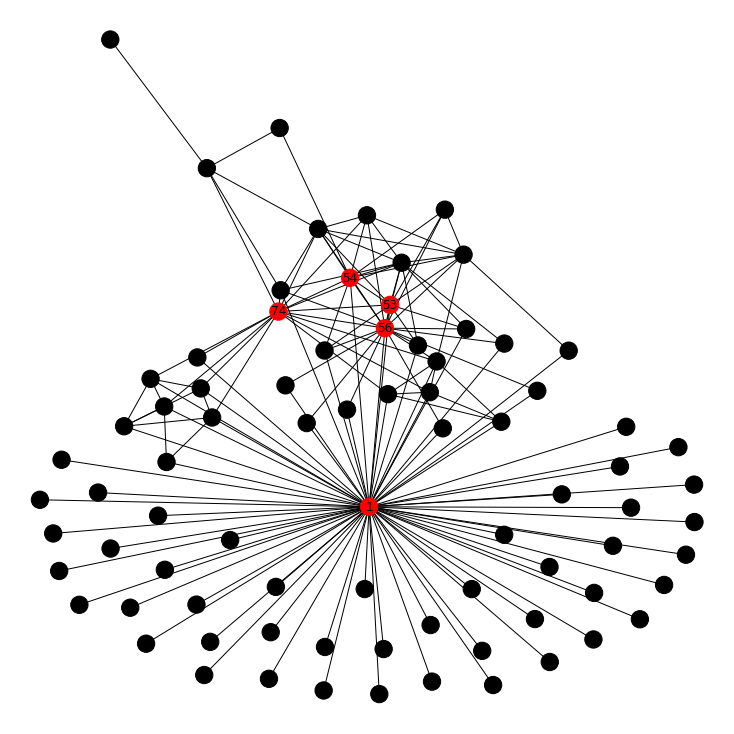

In [15]:
# let us now, color these nodes and visualize the network again

color = []
for node in G:
    if (node == 1 or node == 56  or node == 74 or node==53 or node==54):
        color.append('red')
    else:
        color.append('black')
plt.figure(figsize=(10,10))
nx.draw(G,node_color=color,with_labels=True)

#### Eigen Vector Centrality

In [16]:
temp = {}

for w in sorted(eig_cen, key=eig_cen.get, reverse=True):
    temp[w] = eig_cen[w]
print("Sorted Importance of nodes in terms of eig_cen for Phase {} is {}".format(w+1, list(temp.keys())[:5]))
print()

Sorted Importance of nodes in terms of eig_cen for Phase 72 is [1, 56, 74, 53, 54]



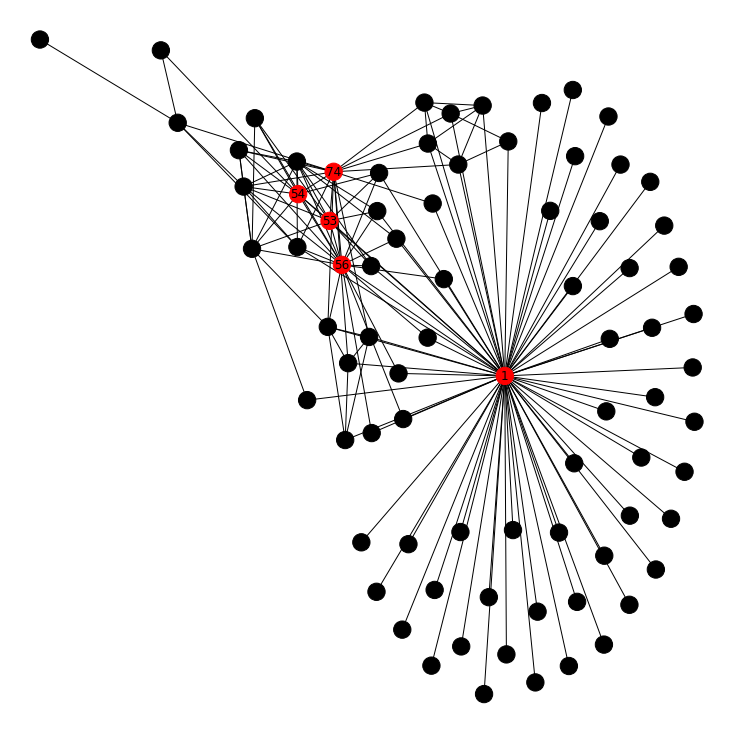

In [17]:
# let us now, color these nodes and visualize the network again

color = []
for node in G:
    if (node == 1 or node == 56  or node == 74 or node==53 or node==54):
        color.append('red')
    else:
        color.append('black')
plt.figure(figsize=(10,10))
nx.draw(G,node_color=color,with_labels=True)

#### Betweenness Centrality


In [18]:
temp = {}

for w in sorted(bet_cen, key=bet_cen.get, reverse=True):
    temp[w] = bet_cen[w]
print("Sorted Importance of nodes in terms of bet_cen is {}".format(list(temp.keys())[:5]))
print()

Sorted Importance of nodes in terms of bet_cen is [1, 56, 54, 27, 74]



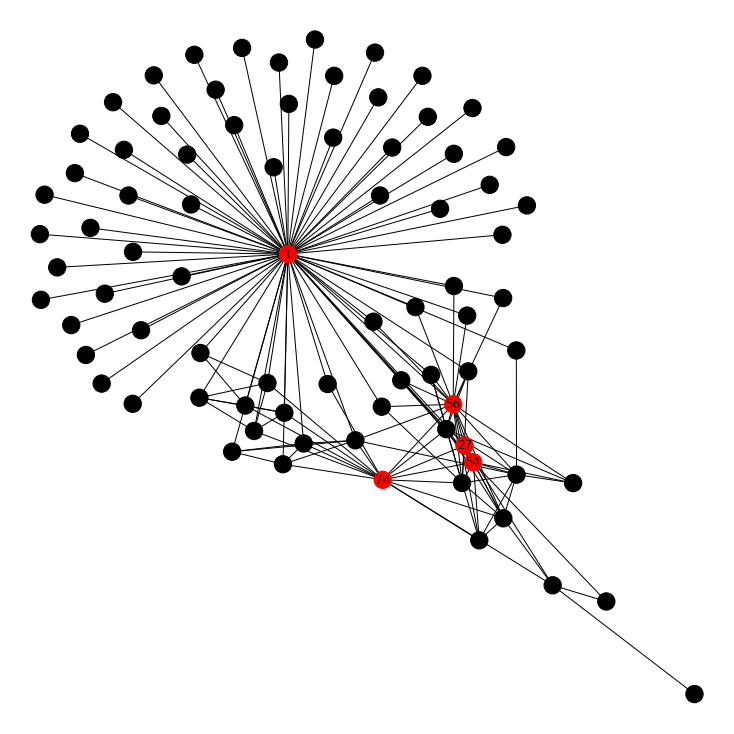

In [19]:
color = []
for node in G:
    if (node == 1 or node == 56  or node == 54 or node==27 or node==74):
        color.append('red')
    else:
        color.append('black')
plt.figure(figsize=(10,10))
nx.draw(G,node_color=color,with_labels=True)

#### Closeness Centrality

In [20]:

temp = {}

for w in sorted(clo_cen, key=clo_cen.get, reverse=True):
    temp[w] = clo_cen[w]
print("Sorted Importance of nodes in terms of clo_cen is {}".format(list(temp.keys())[:5]))
print()

Sorted Importance of nodes in terms of clo_cen is [1, 56, 53, 54, 27]



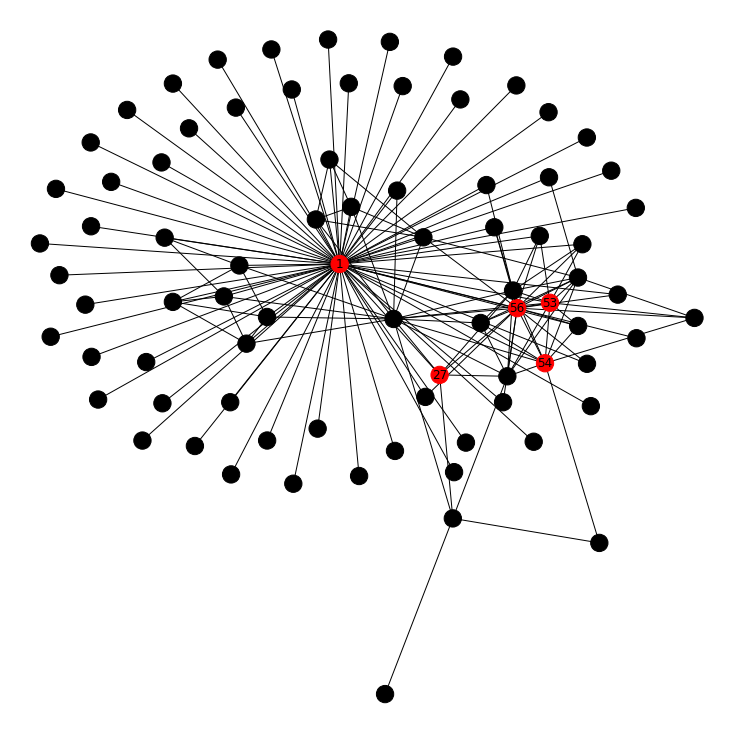

In [21]:
color = []
for node in G:
    if (node == 1 or node == 56  or node == 53 or node==54 or node==27):
        color.append('red')
    else:
        color.append('black')
plt.figure(figsize=(10,10))
nx.draw(G,node_color=color,with_labels=True)

**Conclusion**

- We figured out the connections in the organization through visualizing networks.
- We also worked on various centrality measures, we figured out the important nodes in terms of various centrality measures. The importance of these nodes can be further explained by the definitions of the centralities they correspond to.
- We also identified the CEO node i.e. Node 1
- We could figure out that there were internal team structures but the connections were not very clear